<a href="https://colab.research.google.com/github/Onamihoang/NLP-BERT/blob/master/Fine_Tuned_Bert_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# muc tieu fine tuned Bert QunA

In [0]:
# Su dung thu vien Transformers
! pip install transformers

In [0]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForQuestionAnswering

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') #dong nay khac tren pytorch

model = TFBertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [0]:
question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"
#question = "How many parameters does BERT-large have?"
#text = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."
# Chung ta can tokenizer Bert voi input dau vao [SEP],...

encoding = tokenizer.encode_plus(question, text)
print(encoding)
# sau khi encoding xong chung ta duoc Input_ID, Token_type_ids va Attention_marsk
# Giai thich chi tiet ???

{'input_ids': [101, 2040, 2001, 3958, 27227, 1029, 102, 3958, 27227, 2001, 1037, 3835, 13997, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [0]:
# lay rieng tung gia tri Input_IDs va Token_type_IDs
input_ids, token_type_ids = encoding["input_ids"], encoding["token_type_ids"]

start_scores, end_scores = model(tf.constant(input_ids)[None, :], token_type_ids=tf.constant(token_type_ids)[None, :])
print(start_scores)
print(end_scores)

tf.Tensor(
[[-4.0490365 -4.1443033 -5.7221713 -2.487474  -5.2654643 -8.23279
  -4.0487113  0.3495213 -3.8017685 -1.2564818  7.120186   5.9040704
   3.446948  -4.049016 ]], shape=(1, 14), dtype=float32)
tf.Tensor(
[[ 1.1705111  -4.768074   -5.0704136  -4.3948846  -1.5484083  -4.6082582
   1.1708724  -3.367757   -0.88499033 -3.4271936  -0.76556766  2.3182657
   7.1591263   1.1703053 ]], shape=(1, 14), dtype=float32)


In [0]:
all_tokens = tokenizer.convert_ids_to_tokens(input_ids)

#show tokens
# For each token and its id...
for token, id,seg in zip(all_tokens, input_ids,token_type_ids):
    
    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')
    
    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,} {:>6}'.format(token, id,seg))

    if id == tokenizer.sep_token_id:
        print('')

[CLS]           101      0
who           2,040      0
was           2,001      0
jim           3,958      0
henson       27,227      0
?             1,029      0

[SEP]           102      0

jim           3,958      1
henson       27,227      1
was           2,001      1
a             1,037      1
nice          3,835      1
puppet       13,997      1

[SEP]           102      1



In [0]:
# lay ket qua kieu ngan gon
answer = ' '.join(all_tokens[tf.math.argmax(tf.squeeze(start_scores)) : tf.math.argmax(tf.squeeze(end_scores))+1])
assert len(answer) == len(answer)
print(answer)

a nice puppet


In [0]:
# lay ket qua kieu dai dong :)))

# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)
print(sep_index)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1
print(num_seg_a)

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids) #hay chinh la token_type_ids

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)


6
7
7
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


In [0]:
# start_scores, end_scores = model(tf.constant(input_ids)[None, :], token_type_ids=tf.constant(token_type_ids)[None, :])
# lay cac gia tri tu model (da lam o tren)

In [0]:
# tim ma token co diem so start va end cao nhat
answer_start = tf.math.argmax(tf.squeeze(start_scores))
answer_end = tf.math.argmax(tf.squeeze(end_scores)) + 1

print(answer_start, answer_end)

answer_long = ''.join(all_tokens[answer_start:answer_end])

print('Dap an : "' + answer_long + '"')

# thieu phan chuyen doi ##. Lat them vao ham

tf.Tensor(10, shape=(), dtype=int64) tf.Tensor(13, shape=(), dtype=int64)
Dap an : "a nice puppet"


In [0]:
# Visualizing scores

import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

In [0]:
# chuyen doi tf.Tensor sang 1D numpy arrays
s_scores, e_scores = start_scores.numpy().flatten(), end_scores.numpy().flatten()

print(s_scores)
print(e_scores)
# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(all_tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))
  
print(token_labels)

[-4.0490365 -4.1443033 -5.7221713 -2.487474  -5.2654643 -8.23279
 -4.0487113  0.3495213 -3.8017685 -1.2564818  7.120186   5.9040704
  3.446948  -4.049016 ]
[ 1.1705111  -4.768074   -5.0704136  -4.3948846  -1.5484083  -4.6082582
  1.1708724  -3.367757   -0.88499033 -3.4271936  -0.76556766  2.3182657
  7.1591263   1.1703053 ]
['[CLS] -  0', 'who -  1', 'was -  2', 'jim -  3', 'henson -  4', '? -  5', '[SEP] -  6', 'jim -  7', 'henson -  8', 'was -  9', 'a - 10', 'nice - 11', 'puppet - 12', '[SEP] - 13']


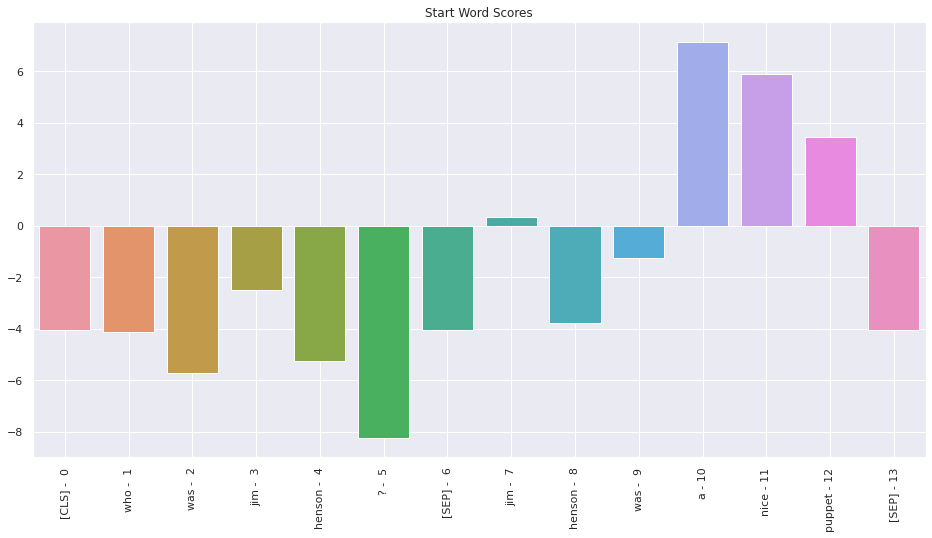

In [0]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

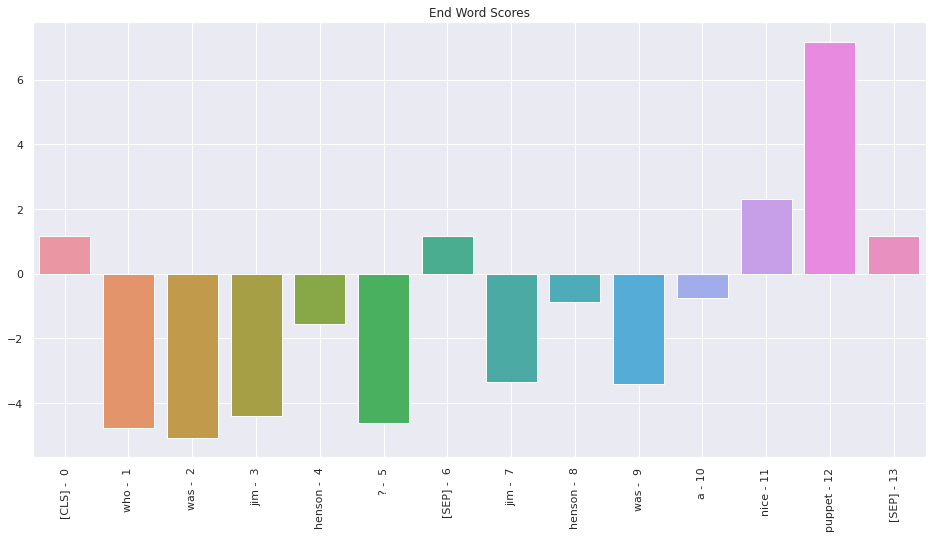

In [0]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

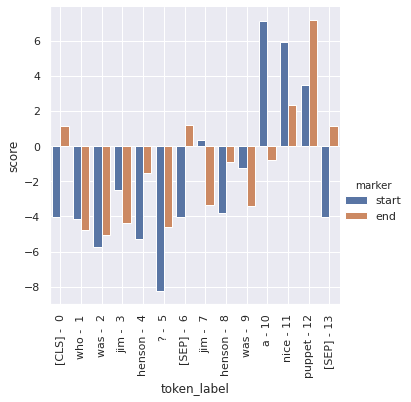

In [0]:
import pandas as pd

# Store the tokens and scores in a DataFrame. 
# Each token will have two rows, one for its start score and one for its end
# score. The "marker" column will differentiate them. A little wacky, I know.
scores = []
for (i, token_label) in enumerate(token_labels):

    # Add the token's start score as one row.
    scores.append({'token_label': token_label, 
                   'score': s_scores[i],
                   'marker': 'start'})
    
    # Add  the token's end score as another row.
    scores.append({'token_label': token_label, 
                   'score': e_scores[i],
                   'marker': 'end'})
    
df = pd.DataFrame(scores)

# Draw a grouped barplot to show start and end scores for each word.
# The "hue" parameter is where we tell it which datapoints belong to which
# of the two series.
g = sns.catplot(x="token_label", y="score", hue="marker", data=df,
                kind="bar")

# Turn the xlabels vertical.
g.set_xticklabels(g.ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
g.ax.grid(True)


In [0]:
# viet ham tra loi
import re
def answer_question(question, content):

  # ============== Set Segment IDs - Token_type_IDs ===============
  encoding = tokenizer.encode_plus(question, content)
  input_ids, token_type_ids = encoding["input_ids"], encoding["token_type_ids"]
  print('Query has {:,} tokens.\n'.format(len(input_ids)))

  # ============== Evaluate =======================
  start_scores, end_scores = model(tf.constant(input_ids)[None, :], token_type_ids=tf.constant(token_type_ids)[None, :])
  all_tokens = tokenizer.convert_ids_to_tokens(input_ids)
  answer = ' '.join(all_tokens[tf.math.argmax(tf.squeeze(start_scores)) : tf.math.argmax(tf.squeeze(end_scores))+1])
  assert len(answer) == len(answer)
  answer = re.sub(' ##','',answer)
  print(answer)

In [0]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80) 

bert_abstract = "We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement)."

print(wrapper.fill(bert_abstract))

We introduce a new language representation model called BERT, which stands for
Bidirectional Encoder Representations from Transformers. Unlike recent language
representation models (Peters et al., 2018a; Radford et al., 2018), BERT is
designed to pretrain deep bidirectional representations from unlabeled text by
jointly conditioning on both left and right context in all layers. As a result,
the pre-trained BERT model can be finetuned with just one additional output
layer to create state-of-the-art models for a wide range of tasks, such as
question answering and language inference, without substantial taskspecific
architecture modifications. BERT is conceptually simple and empirically
powerful. It obtains new state-of-the-art results on eleven natural language
processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute
improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1
question answering Test F1 to 93.2 (1.5 point absolute improvement) 

In [0]:
question2 = "What does the 'B' in BERT stand for?"

answer_question(question2, bert_abstract)

Query has 258 tokens.

bidirectional encoder representations from transformers
